In [51]:
#!/usr/bin/python

# data processing packages
import numpy as np   
import pandas as pd 

from pandas import *
from numpy import *
from scipy import *

import random
import sys

# machine leanring packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import xgboost as xgb

# own utilities
from utils_dataPrepro import *
# from ml_models import *
#from utils_keras import *

# statiscal models
import statsmodels as stats
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

# visulization
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import IPython
from IPython.display import display

In [7]:
# dataset_str = str(sys.argv[1])
# print "Load dataset %s"%dataset_str

dataset_str = "air"

file_dic = { "stock":0,\
             "power":1,\
             "air":2,\
           }

files_list=[]
files_list.append( ["../../dataset/dataset_ts/stock_xtrain.dat", \
            "../../dataset/dataset_ts/stock_xtest.dat"] )
                    
files_list.append( ["../../dataset/dataset_ts/power_xtrain.dat", \
            "../../dataset/dataset_ts/power_xtest.dat"] )
                    
files_list.append( ["../../dataset/dataset_ts/air_xtrain.dat", \
            "../../dataset/dataset_ts/air_xtest.dat"] )


xtr = np.load(files_list[ file_dic[dataset_str] ][0])
xts = np.load(files_list[ file_dic[dataset_str] ][1])

# xtrain, xtest, _, _ = \
# prepare_train_test_data( False, files_list[ file_dic[dataset_str] ])

print np.shape(xtr), np.shape(xts)


(5000, 2) (1600, 2)


In [57]:
def univariate_ts_plot( ts_list,title_str ):
    
    mplt.rcParams.update({'font.size': 15})
    figure_size = (10,5)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range( len(ts_list) )    
    plt.plot( tmpt, ts_list )

    plt.title( title_str )
    
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')

def univariate_ts_scatter( ts_list,title_str ):
    
    mplt.rcParams.update({'font.size': 15})
    figure_size = (10,5)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
#     fig, ax = plt.subplots(figsize=(16,12))  
    
    tmpt = range( len(ts_list) )    
    plt.plot(tmpt, ts_list, marker='o', linestyle='--') 
#     plt.scatter( tmpt, ts_list )

    plt.title( title_str )
    
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')

In [26]:
# GRANGER CAUSALITY

# http://davegiles.blogspot.ch/2011/04/testing-for-granger-causality.html


3893


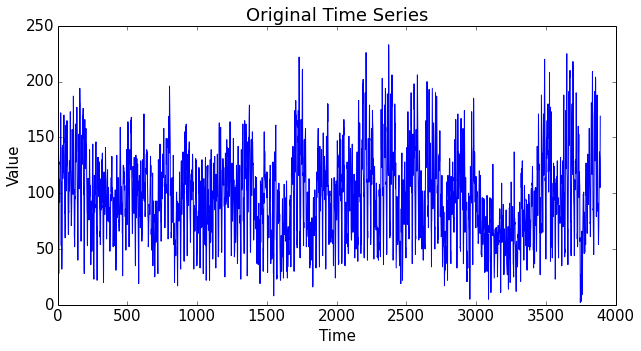

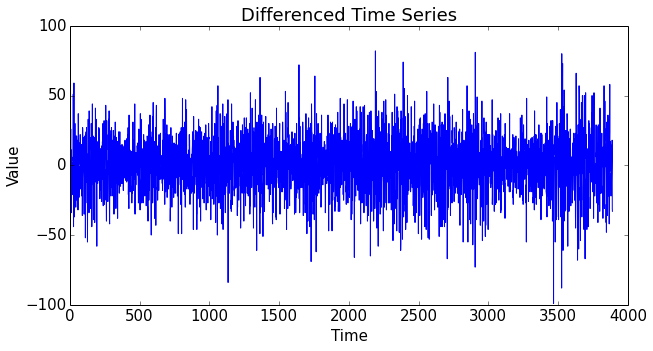

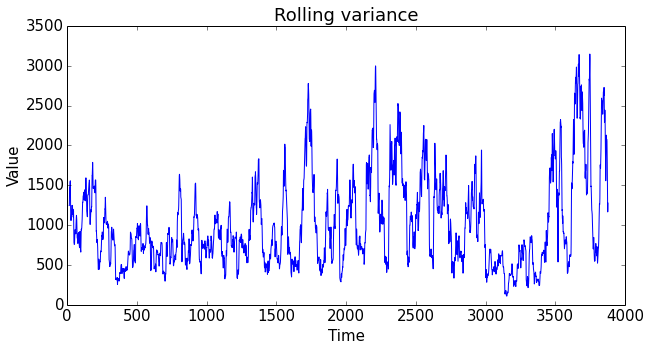

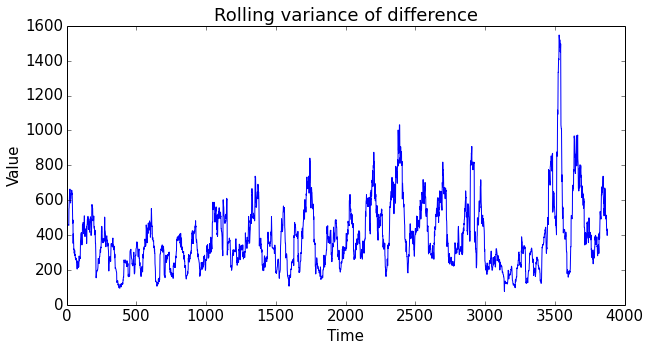

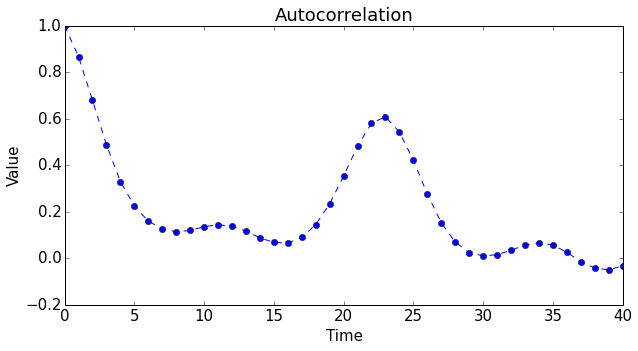

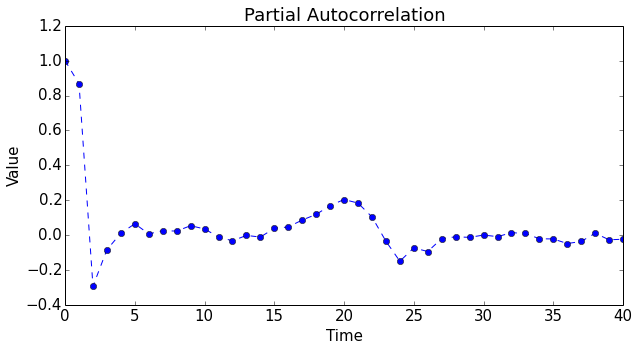

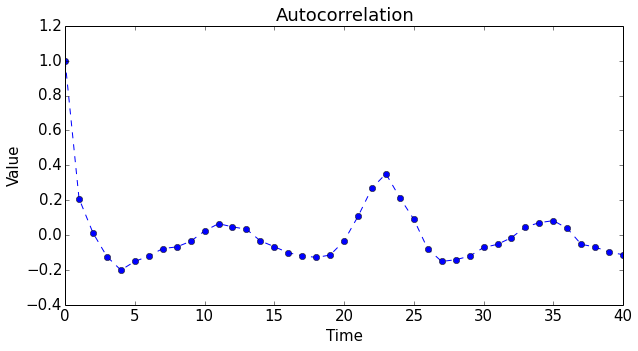

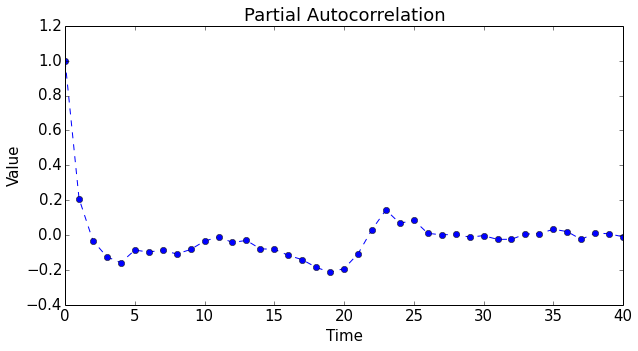

In [68]:
# Non-stationary time series analysis 
tmp_ts = [xtr[i][0] for i in xrange(len(xtr))]
print len(tmp)

# filter out the lower-boundary values
tmp_ts = [i for i in tmp if i !=-200]
length = len(tmp)

# 1-order differening 
ts_df = pd.DataFrame(tmp_ts)
ts_df_shift = ts_df.shift()

ts_df       = ts_df.iloc[1:length]
ts_df_shift = ts_df_shift.iloc[1:length]

ts_diff = ts_df_shift - ts_df

univariate_ts_plot( ts_df[1:],   'Original Time Series' )
univariate_ts_plot( ts_diff[1:], 'Differenced Time Series' )

# rolling variance 
roll_var = pd.rolling_var(ts_df, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var, 'Rolling variance' )

roll_var_diff = pd.rolling_var(ts_diff, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var_diff, 'Rolling variance of difference' )

# stock_data['Original Variance'].plot(ax=ax[0], title='Original Variance')  
# stock_data['Log Variance'].plot(ax=ax[1], title='Log Variance')  
# fig.tight_layout()  


# auto-correlation
lag_corr = acf( ts_df)  
lag_pcorr = pacf( ts_df )

univariate_ts_scatter( lag_corr,  'Autocorrelation' )
univariate_ts_scatter( lag_pcorr, 'Partial Autocorrelation' )

lag_corr  = acf(  ts_diff)  
lag_pcorr = pacf( ts_diff )

univariate_ts_scatter( lag_corr,  'Autocorrelation' )
univariate_ts_scatter( lag_pcorr, 'Partial Autocorrelation' )


In [ ]:
# ARIMA model 

model = sm.tsa.ARIMA(ts_diff, order=(10, 0, 10))  
results = model.fit(disp=-1)  

err = model.geterrors(params)
model.predict( start=1, end=10 )



In [30]:
stats.tsa.stattools.kpss( tmp, regression='c', lags=None, store=False)

/usr/local/lib/python2.7/dist-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0470328826072595,
 0.01,
 32,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [45]:
tmp = [xtr[i][1] for i in xrange(len(xtr))]
stats.tsa.stattools.kpss( tmp, regression='c', lags=None, store=False)

/usr/local/lib/python2.7/dist-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.25198563005345853,
 0.1,
 32,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [22]:
stats.tsa.stattools.grangercausalitytests(xtr, 5, addconst=True, verbose=True)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=8.5179  , p=0.0035  , df_denom=4996, df_num=1
ssr based chi2 test:   chi2=8.5230  , p=0.0035  , df=1
likelihood ratio test: chi2=8.5157  , p=0.0035  , df=1
parameter F test:         F=8.5179  , p=0.0035  , df_denom=4996, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=39.0032 , p=0.0000  , df_denom=4993, df_num=2
ssr based chi2 test:   chi2=78.0845 , p=0.0000  , df=2
likelihood ratio test: chi2=77.4808 , p=0.0000  , df=2
parameter F test:         F=39.0032 , p=0.0000  , df_denom=4993, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=44.4335 , p=0.0000  , df_denom=4990, df_num=3
ssr based chi2 test:   chi2=133.4874, p=0.0000  , df=3
likelihood ratio test: chi2=131.7356, p=0.0000  , df=3
parameter F test:         F=44.4335 , p=0.0000  , df_denom=4990, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:     

{1: ({'lrtest': (8.5157439423055621, 0.0035208695871017394, 1),
   'params_ftest': (8.5178864790577453, 0.003532423992764073, 4996.0, 1),
   'ssr_chi2test': (8.5230013027933378, 0.0035068567201287397, 1),
   'ssr_ftest': (8.5178864790469113, 0.0035324239927845605, 4996.0, 1)},
   array([[ 0.,  1.,  0.]])]),
 2: ({'lrtest': (77.48083195684012, 1.4971010464808453e-17, 2),
   'params_ftest': (39.003199914311082, 1.5562615779168659e-17, 4993.0, 2),
   'ssr_chi2test': (78.08451559050765, 1.107038891716893e-17, 2),
   'ssr_ftest': (39.003199914306194, 1.5562615779242526e-17, 4993.0, 2)},
   array([[ 0.,  0.,  1.,  0.,  0.],
          [ 0.,  0.,  0.,  1.,  0.]])]),
 3: ({'lrtest': (131.73561450112902, 2.2857377938939879e-28, 3),
   'params_ftest': (44.433483185925958, 2.4886544608314354e-28, 4990.0, 3),
   'ssr_chi2test': (133.48744417640077, 9.5818136520231394e-29, 3),
   'ssr_ftest': (44.43348318592755, 2.4886544608257943e-28, 4990.0, 3)},
   array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
    

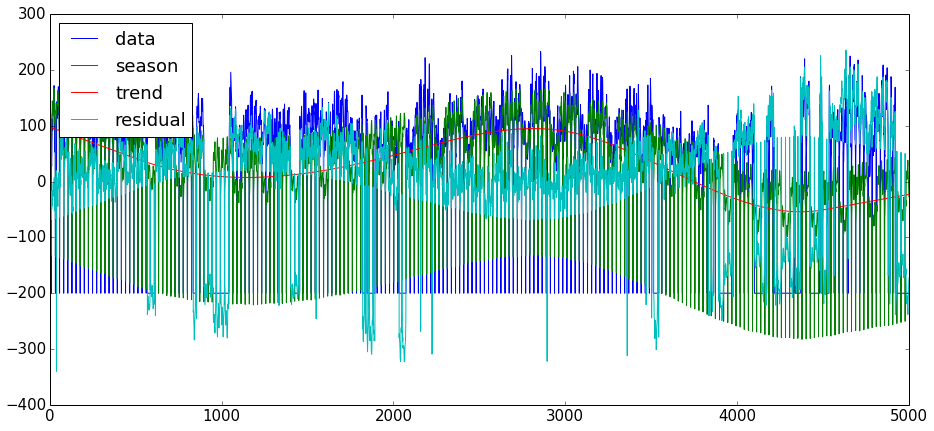

In [23]:
# DECOMPOSITION, numerical 

# https://github.com/welch/seasonal
from seasonal import fit_seasons, adjust_seasons

s = tmp
# detrend and deseasonalize
seasons, trend = fit_seasons(s)
adjusted = adjust_seasons(s, seasons=seasons, )
residual = adjusted - trend

mplt.rcParams.update({'font.size': 15})
figure_size = (15.4,7)
legend_font = 8.5
fig = plt.figure()

fig = plt.figure()
fig.set_size_inches( figure_size )

plt.plot(s, label='data')
# plt.plot(s - residual, label='trend+season')
plt.plot(s - residual, label='season')
plt.plot(trend, label='trend')
plt.plot(residual, label='residual')
plt.legend(loc='upper left')
